# 1.0 Import Libraries and Dataset


In [ ]:
!pip install pandas-profiling==2.9.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np

In [6]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


country_region_code  ... residential_percent_change_from_baseline
0                  AE  ...                                      1.0
1                  AE  ...                                      1.0
2                  AE  ...                                      1.0
3                  AE  ...                                      1.0
4                  AE  ...                                      1.0

[5 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621847 entries, 0 to 2621846
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

In [4]:
pandas_profiling.ProfileReport(data)

# 2.0 Pre-processing and Cleaning

In [7]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country","state","city","date","retail","grocery","parks","transit","workplaces","residential"]
data_br.date = pd.to_datetime(data_br.date)
data_br.index = data_br.date
data_br.drop(labels="date",axis=1,inplace=True) 
data_br.state = data_br.state.str.replace("State of ","")
data_br

country      state            city  ...  transit  workplaces  residential
date                                           ...                                  
2020-02-15  Brazil        NaN             NaN  ...      8.0         6.0          0.0
2020-02-16  Brazil        NaN             NaN  ...      3.0         0.0          1.0
2020-02-17  Brazil        NaN             NaN  ...      9.0        19.0         -1.0
2020-02-18  Brazil        NaN             NaN  ...      9.0        15.0         -1.0
2020-02-19  Brazil        NaN             NaN  ...      8.0        14.0         -1.0
...            ...        ...             ...  ...      ...         ...          ...
2020-09-21  Brazil  Tocantins  Tocantinópolis  ...      NaN        -2.0          NaN
2020-09-22  Brazil  Tocantins  Tocantinópolis  ...      NaN        -8.0          NaN
2020-09-23  Brazil  Tocantins  Tocantinópolis  ...      NaN        -6.0          NaN
2020-09-24  Brazil  Tocantins  Tocantinópolis  ...      NaN        -1.0          NaN
2020-09-25  Brazil  Tocantins  Tocantinópolis  ...      NaN        13.0          NaN

[419430 rows x 9 columns]

In [8]:
data_state_br = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()

In [9]:
data_state_br.state.unique()

array(['Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [10]:
state_region={
'Amazonas':'North',
'Roraima':'North',
'Amapá':'North',
'Pará':'North',
'Tocantins':'North',
'Rondônia':'North',
'Acre':'North',
'Maranhão': 'Northeast',
'Piauí': 'Northeast',
'Ceará': 'Northeast',
'Rio Grande do Norte': 'Northeast',
'Pernambuco': 'Northeast',
'Paraíba': 'Northeast',
'Sergipe': 'Northeast',
'Alagoas': 'Northeast',
'Bahia': 'Northeast',
'Mato Grosso': 'Midwest',
'Mato Grosso do Sul': 'Midwest',
'Goiás': 'Midwest',
'Federal District': 'Midwest',
'São Paulo': 'Southeast',
'Rio de Janeiro': 'Southeast',
'Espírito Santo': 'Southeast',
'Minas Gerais': 'Southeast',
'Paraná': 'South',
'Rio Grande do Sul': 'South',
'Santa Catarina': 'South',
}

In [11]:
data_state_br['region']= [state_region[v] for v in data_state_br.state.values]
data_state_br = data_state_br.drop(['city'],axis=1)

In [16]:
data_process = data_state_br.loc[~data_state_br.retail.isnull()]

In [17]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4968 entries, 2020-02-15 to 2020-08-16
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      4968 non-null   object 
 1   state        4968 non-null   object 
 2   retail       4968 non-null   float64
 3   grocery      4968 non-null   float64
 4   parks        4968 non-null   float64
 5   transit      4968 non-null   float64
 6   workplaces   4968 non-null   float64
 7   residential  4968 non-null   float64
 8   region       4968 non-null   object 
dtypes: float64(6), object(3)
memory usage: 388.1+ KB


# 3.0 Processing and plot

In [14]:
data_process.groupby(by=[data_process.index,"region"]).mean().unstack()['retail']

region      Midwest      North  Northeast      South  Southeast
date                                                           
2020-02-15     4.75   6.000000   1.333333   3.333333       4.75
2020-02-16     3.50   2.571429  -2.777778  -2.666667      -0.75
2020-02-17    -1.50  -2.428571  -4.333333  -5.000000      -1.25
2020-02-18    -0.75  -2.428571  -3.111111  -5.666667      -1.50
2020-02-19    -3.75  -4.285714  -3.222222  -2.666667       0.25
...             ...        ...        ...        ...        ...
2020-08-12   -20.25 -12.714286 -25.444444 -32.333333     -27.50
2020-08-13   -18.75 -11.714286 -25.777778 -30.000000     -27.50
2020-08-14   -18.50 -11.428571 -25.111111 -29.000000     -25.25
2020-08-15   -21.75 -13.571429 -28.555556 -37.000000     -31.25
2020-08-16   -33.00 -21.428571 -37.777778 -52.333333     -41.50

[184 rows x 5 columns]

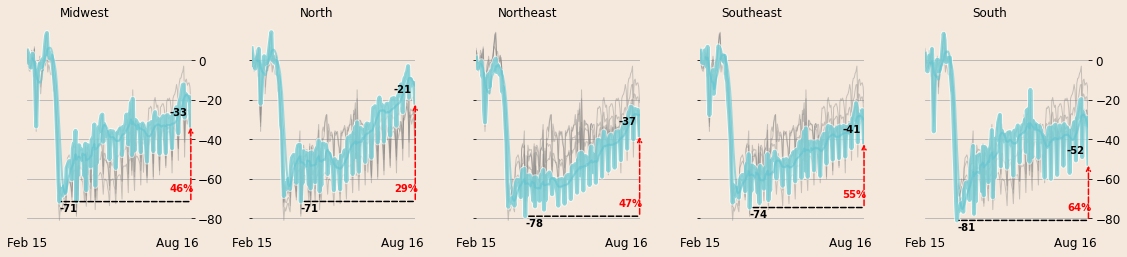

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(16,4))
# fig.path.set_facecolor('#f5e9dd')
fig.set_facecolor('#f5e9dd')
fig.tight_layout(pad=3.0)
item = "retail" 
first_day=data_process.index.unique()[0].strftime("%b %d")
last_day=data_process.index.unique()[-1].strftime("%b %d")
for i,region in enumerate(data_process.region.unique()):
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item].plot(legend=False,color="grey",linewidth=1, alpha=0.4, ax=ax[i])
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].plot(legend=False,color="white",linewidth=6, alpha=0.6, ax=ax[i],)
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].plot(legend=False,color="#48c0ca",linewidth=4, alpha=0.6, ax=ax[i],)
  
  y_values= data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].values
  x_values = data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].index
  # x_values =[]
  y_min= min(y_values[6:])
  x_pos = np.where(y_values==y_min)[-1][-1] 
  x_min = x_values[x_pos]
  # print(x_min,y_min)
  ax[i].annotate(int(np.around(y_min, decimals=1)), xy=(x_min, y_min), xytext=(x_min, y_min-5),weight='bold')
  y_last= y_values[-1]
  x_last = x_values[-1]
  x_pos_last = np.where(y_values==y_last)[-1][-1] 
  x_last_pos = x_values[-25]
  x_pct_pos =x_values[-30]
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().plot(legend=False,color="#60c4d0",linewidth=2, alpha=0.6, ax=ax[i],markevery=[x_pos,x_pos_last])
  ax[i].annotate(int(np.around(y_last, decimals=1)), xy=(x_last,y_last), xytext=(x_last_pos,y_last+5),weight='bold')
  ax[i].annotate("", xy=(x_min, y_min), xytext=(x_last,y_min), xycoords="data",
             arrowprops={"arrowstyle":"-", "linestyle":"--", "linewidth":1.5})
  ax[i].annotate("", xy=(x_last,y_last), xytext=(x_last, y_min), xycoords="data",
             arrowprops={"arrowstyle":"->", "linestyle":"--", "linewidth":1.5,'color':'red'})
  ax[i].set_title(region,fontsize=12,ha='right')
  pct = int((y_last*100)/y_min)
  ax[i].annotate("%s%s"%(pct,'%'), xy=(x_last,y_min), xytext=(x_last_pos,y_min+5),color='red',weight='bold')
  data_point = {'date':[x_min,x_last],
                'y_label':[y_min,y_last]}
  # df = pd.DataFrame(data_point)
  # df.index = df.date
  # df.drop(labels="date",axis=1,inplace=True) 
  # df.plot(legend=False,color="blue", alpha=0.6, ax=ax[i])
  # data_process.loc[data_process.index in [x_min,x_last]]
  ax[i].xaxis.grid(False)
  ax[i].yaxis.grid(True)
  ax[i].set_xlabel("")
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[i].spines["left"].set_visible(False)
  ax[i].spines["bottom"].set_visible(False)
  ax[i].tick_params(axis = "x", which = "both", bottom = False, top = False)
  ax[i].set_xticklabels([first_day,"","","","","",last_day])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  ax[i].set_facecolor('#f5e9dd')
  if (i==0) or (i==4):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("states.png",dpi=300)
plt.show()

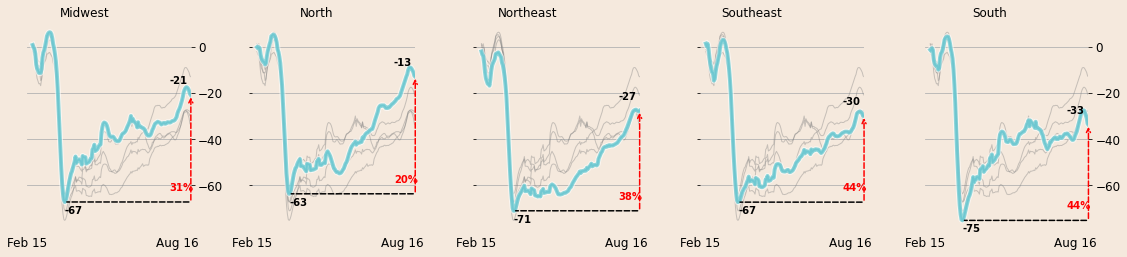

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(16,4))
# fig.path.set_facecolor('#f5e9dd')
fig.set_facecolor('#f5e9dd')
fig.tight_layout(pad=3.0)
item = "retail" 
first_day=data_process.index.unique()[0].strftime("%b %d")
last_day=data_process.index.unique()[-1].strftime("%b %d")
for i,region in enumerate(data_process.region.unique()):
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1, alpha=0.4, ax=ax[i])
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().plot(legend=False,color="white",linewidth=6, alpha=0.6, ax=ax[i],)
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().plot(legend=False,color="#48c0ca",linewidth=4, alpha=0.6, ax=ax[i],)
  
  y_values= data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().values
  x_values = data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().index
  # x_values =[]
  y_min= min(y_values[6:])
  x_pos = np.where(y_values==y_min)[-1][-1] 
  x_min = x_values[x_pos]
  # print(x_min,y_min)
  ax[i].annotate(int(np.around(y_min, decimals=1)), xy=(x_min, y_min), xytext=(x_min, y_min-5),weight='bold')
  y_last= y_values[-1]
  x_last = x_values[-1]
  x_pos_last = np.where(y_values==y_last)[-1][-1] 
  x_last_pos = x_values[-25]
  x_pct_pos =x_values[-30]
  data_process.groupby(by=[data_process.index,"region"]).mean().unstack()[item][region].rolling(window=7).mean().plot(legend=False,color="#60c4d0",linewidth=2, alpha=0.6, ax=ax[i],markevery=[x_pos,x_pos_last])
  ax[i].annotate(int(np.around(y_last, decimals=1)), xy=(x_last,y_last), xytext=(x_last_pos,y_last+5),weight='bold')
  ax[i].annotate("", xy=(x_min, y_min), xytext=(x_last,y_min), xycoords="data",
             arrowprops={"arrowstyle":"-", "linestyle":"--", "linewidth":1.5})
  ax[i].annotate("", xy=(x_last,y_last), xytext=(x_last, y_min), xycoords="data",
             arrowprops={"arrowstyle":"->", "linestyle":"--", "linewidth":1.5,'color':'red'})
  ax[i].set_title(region,fontsize=12,ha='right')
  pct = int((y_last*100)/y_min)
  ax[i].annotate("%s%s"%(pct,'%'), xy=(x_last,y_min), xytext=(x_last_pos,y_min+5),color='red',weight='bold')
  data_point = {'date':[x_min,x_last],
                'y_label':[y_min,y_last]}
  # df = pd.DataFrame(data_point)
  # df.index = df.date
  # df.drop(labels="date",axis=1,inplace=True) 
  # df.plot(legend=False,color="blue", alpha=0.6, ax=ax[i])
  # data_process.loc[data_process.index in [x_min,x_last]]
  ax[i].xaxis.grid(False)
  ax[i].yaxis.grid(True)
  ax[i].set_xlabel("")
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[i].spines["left"].set_visible(False)
  ax[i].spines["bottom"].set_visible(False)
  ax[i].tick_params(axis = "x", which = "both", bottom = False, top = False)
  ax[i].set_xticklabels([first_day,"","","","","",last_day])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  ax[i].set_facecolor('#f5e9dd')
  if (i==0) or (i==4):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("states.png",dpi=300)
plt.show()